In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('titanic-project-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
mean_age = df['Age'].mean()
print(int(mean_age))

29


In [8]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [9]:
df['Age'] = df['Age'].astype(int) 
df['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [12]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [13]:
# df = df.dropna(axis=1)  
# df = df.reset_index(drop=True)

# df.isnull().sum()

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [18]:
df['Embarked'].fillna(value='S', inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
df = df.dropna(axis=1)  
df = df.reset_index(drop=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,1,0,0,1


In [23]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
df = pd.get_dummies(df, columns=['Pclass'])
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    int32  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Sex_female   891 non-null    uint8  
 9   Sex_male     891 non-null    uint8  
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
 13  Pclass_1     891 non-null    uint8  
 14  Pclass_2     891 non-null    uint8  
 15  Pclass_3     891 non-null    uint8  
dtypes: float64(1), int32(1), int64(4), object(2), uint8(8)
memory usage: 59.3+ KB


In [28]:
df = df.drop(columns=['Name', 'Ticket'])
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,35,0,0,8.0500,0,1,0,0,1,0,0,1


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pm_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


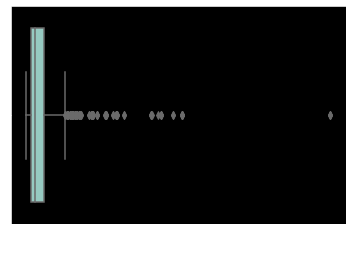

In [30]:
box_fare = sns.boxplot(df['Fare'])

In [31]:
from scipy.stats import iqr
fare_q1 = df['Fare'].quantile(0.25)
fare_q3 = df['Fare'].quantile(0.75)
inter_fare_qr = iqr(df['Fare'])

print(fare_q1)
print(fare_q3)
print(inter_fare_qr)

7.9104
31.0
23.0896


In [32]:
import numpy as np
df['outliers'] = 0
df['outliers'] = np.where(df['Fare']>(fare_q3 + 1.5*inter_fare_qr), 1, df['outliers'])
df['outliers'] = np.where(df['Fare']<(fare_q1 - 1.5*inter_fare_qr), 1, df['outliers'])
df.outliers.value_counts()

0    775
1    116
Name: outliers, dtype: int64

In [33]:
df = df[df['outliers']==0]

In [34]:
input_columns = [column for column in df.columns if column != 'Survived']
output_column = 'Survived'
print(input_columns)
print('\n')
print(output_column)

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'outliers']


Survived


In [35]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,outliers
0,1,0,22,1,0,7.2500,0,1,0,0,1,0,0,1,0
2,3,1,26,0,0,7.9250,1,0,0,0,1,0,0,1,0
3,4,1,35,1,0,53.1000,1,0,0,0,1,1,0,0,0
4,5,0,35,0,0,8.0500,0,1,0,0,1,0,0,1,0
5,6,0,29,0,0,8.4583,0,1,0,1,0,0,0,1,0


In [36]:
x = df.loc[:,input_columns].values
y = df.loc[:,output_column].values
print(x.shape, y.shape)

(775, 14) (775,)


In [37]:
df_test = pd.read_csv("titanic-project-test")

AttributeError: module 'pandas' has no attribute 'readcsv'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100,stratify = y)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

In [ ]:
print(np.sum(y_train))
print(np.sum(y_test))

In [ ]:
logreg = LogisticRegression().fit(x_train, y_train)

In [ ]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

In [ ]:
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
train_confusion = metrics.confusion_matrix(y_train, y_train_pred)
train_TP = train_confusion[1, 1]
train_TN = train_confusion[0, 0]
train_FP = train_confusion[0, 1]
train_FN = train_confusion[1, 0]

In [ ]:
test_confusion = metrics.confusion_matrix(y_test, y_test_pred)
test_TP = test_confusion[1, 1]
test_TN = test_confusion[0, 0]
test_FP = test_confusion[0, 1]
test_FN = test_confusion[1, 0]

In [ ]:
print(train_confusion)

In [ ]:
print(test_confusion)

In [ ]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_pred)

In [ ]:
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_pred)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(test_fpr, test_tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()